# Project 1

In [39]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
# Importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample

In [41]:
# Importing project-specific files
from DataFunctions import FrankeFunction, SimpleFunction
from LinearRegression import OLS_matrix_inversion, ridge_regression
from GradientDescent import GradientDescent, StochasticGradientDescent
from GradientDescent import OLSGradientDescent, RidgeGradientDescent
from GradientDescent import OLSStochasticGradientDescent, RidgeStochasticGradientDescent
from Statistics import MSE, R2

In [42]:
# Defining first data set
step_size = 0.05
arr = np.arange(0, 1, step_size)

Mat = np.meshgrid(arr, arr)
data = FrankeFunction(*Mat, noise=0)

In [92]:
import matplotlib as mpl
font = {'size'   : 14}
mpl.rc('font', **font)

## Part f): Write your own Stochastic Gradient Descent code
### 1. Plain gradient descent with fixed learning rate

In [52]:
# defining dataset 
X = np.c_[np.ones_like(arr), arr, arr**2]
ndata, ndims = np.shape(X)

params = [2, 3, 4]
data = SimpleFunction(arr, params)

# performing gradient descent
tolerance = 1e-4
learning_rate = 10**(np.linspace(-5, 1, 20))
ols_niter_plain = np.zeros_like(learning_rate)
ols_converged_plain = np.zeros_like(learning_rate)
ols_cost_plain = np.zeros_like(learning_rate)

ridge_niter_plain = np.zeros_like(learning_rate)
ridge_converged_plain = np.zeros_like(learning_rate)
ridge_cost_plain = np.zeros_like(learning_rate)


In [53]:
lmbd=0.01
i = 0
for lr in learning_rate:
    ols_beta_temp, ols_niter_plain[i], ols_cost_plain[i] = OLSGradientDescent(X, data, learning_rate=lr, momentum=0);
    ridge_beta_temp, ridge_niter_plain[i], ridge_cost_plain[i] = RidgeGradientDescent(X, data, lmbd, learning_rate=lr, momentum=0);
    
    if sum(ols_beta_temp - params) < tolerance :
        ols_converged_plain[i] = 1

    if sum(ridge_beta_temp - params) < tolerance :
        ridge_converged_plain[i] = 1

    i += 1

/home/silja/Programs/miniconda3/envs/compsci/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/silja/Programs/miniconda3/envs/compsci/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/Statistics.py:19: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(M**2))
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/GradientDescent.py:145: RuntimeWarning: invalid value encountered in multiply
  beta = beta - momentum * gradient(beta_prev) - learning_rate * grad_beta / (np.sqrt(s) + eps)
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/GradientDescent.py:202: RuntimeWarning: overflow encountered in multiply
  beta = beta - momentum * gradient(beta_prev) - learning_rate * grad_beta / (np.sq

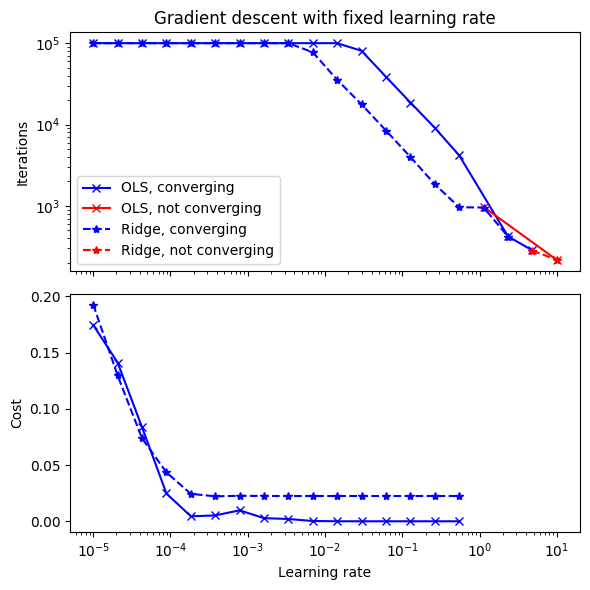

In [58]:
# tuning learning rate
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True);

ax[0].plot(learning_rate[ols_converged_plain==1], ols_niter_plain[ols_converged_plain==1], 'bx-', label="OLS, converging");
ax[0].plot(learning_rate[ols_converged_plain==0], ols_niter_plain[ols_converged_plain==0], 'rx-', label="OLS, not converging");
ax[0].plot(learning_rate[ridge_converged_plain==1], ridge_niter_plain[ridge_converged_plain==1], 'b*--', label="Ridge, converging");
ax[0].plot(learning_rate[ridge_converged_plain==0], ridge_niter_plain[ridge_converged_plain==0], 'r*--', label="Ridge, not converging");



ax[1].plot(learning_rate[ols_converged_plain==1], ols_cost_plain[ols_converged_plain==1], 'bx-', label="OLS, converging");
ax[1].plot(learning_rate[ridge_converged_plain==1], ridge_cost_plain[ridge_converged_plain==1], 'b*--', label="Ridge, converging");

ax[0].set(title="Gradient descent with fixed learning rate", ylabel="Iterations");
ax[1].set(xlabel="Learning rate", ylabel="Cost", yscale="linear");

ax[0].set(xscale="log", yscale="log")
ax[0].legend();

fig.tight_layout()

In [59]:
fig.savefig("figs/GD_fixed_learning_rate.pdf")

### 2. Add momentum and compare convergence

/home/silja/Programs/miniconda3/envs/compsci/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/silja/Programs/miniconda3/envs/compsci/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/Statistics.py:19: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(M**2))
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/GradientDescent.py:154: RuntimeWarning: invalid value encountered in matmul
  cost = norm2(X @ beta - y) / ndata
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/GradientDescent.py:211: RuntimeWarning: invalid value encountered in matmul
  cost = norm2(X @ beta - y) / ndata
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/GradientDescent.py:145: RuntimeWarning: o

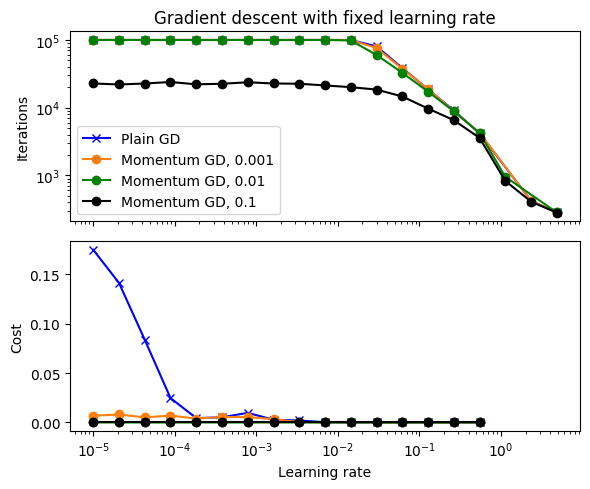

In [60]:
# tuning learning rate
fig, ax = plt.subplots(2, 1, figsize=(6,5), sharex=True);
ax[0].plot(learning_rate[ols_converged_plain==1], ols_niter_plain[ols_converged_plain==1], 'bx-', label="Plain GD");
ax[1].plot(learning_rate[ols_converged_plain==1], ols_cost_plain[ols_converged_plain==1], 'bx-', label="Plain GD");

# performing gradient descent
momentum = [0.001, 0.01, 0.1]
color = ['tab:orange', 'g', 'k']

j = 0
for mom in momentum:
    ols_niter_momentum = np.zeros_like(learning_rate)
    ols_converged_momentum = np.zeros_like(learning_rate)
    ols_cost_momentum = np.zeros_like(learning_rate)

    ridge_niter_momentum = np.zeros_like(learning_rate)
    ridge_converged_momentum = np.zeros_like(learning_rate)
    ridge_cost_momentum = np.zeros_like(learning_rate)

    i = 0
    for lr in learning_rate:
        ols_beta_temp, ols_niter_momentum[i], ols_cost_momentum[i] = OLSGradientDescent(X, data, learning_rate=lr, momentum=mom);
        ridge_beta_temp, ridge_niter_momentum[i], ridge_cost_momentum[i] = RidgeGradientDescent(X, data, lmbd, learning_rate=lr, momentum=mom);
        
        if sum(ols_beta_temp - params) < tolerance :
            ols_converged_momentum[i] = 1
        if sum(ridge_beta_temp - params) < tolerance :
            ridge_converged_momentum[i] = 1

        i += 1

    ax[0].plot(learning_rate[ols_converged_momentum==1], ols_niter_momentum[ols_converged_momentum==1], 'o-', c=color[j], label=f"Momentum GD, {mom}");
    ax[1].plot(learning_rate[ols_converged_momentum==1], ols_cost_momentum[ols_converged_momentum==1], 'o-', c=color[j], label="Momentum GD");
    
    #ax[0].plot(learning_rate[ridge_converged_momentum==1], ridge_niter_momentum[ridge_converged_momentum==1], 'o-', c=color[j], label=f"Momentum GD, {mom}");
    #ax[1].plot(learning_rate[ridge_converged_momentum==1], ridge_cost_momentum[ridge_converged_momentum==1], 'o-', c=color[j], label="Momentum GD");   
    j += 1



ax[0].set(title="Gradient descent with fixed learning rate", ylabel="Iterations");
ax[1].set(xlabel="Learning rate", ylabel="Cost");

ax[0].set(xscale="log", yscale="log")
ax[0].legend();

fig.tight_layout()

In [61]:
fig.savefig("figs/GD_momentum_OLS.pdf")

### 3. Repeat for stochastic

In [147]:
batch_sizes = np.array([1, 2, 4, 5, 10, 20])
nepochs = np.arange(0, 200, 5)
ols_cost_stoch = np.zeros([len(batch_sizes), len(nepochs)])
ridge_cost_stoch = np.zeros([len(batch_sizes), len(nepochs)])

i = 0
for size in batch_sizes:
    j = 0
    for epochs in nepochs:
        _, ols_cost_stoch[i, j] = OLSStochasticGradientDescent(X, data, learning_rate=0.1, momentum=0, nepochs=epochs, batch_size=size)
        _, ridge_cost_stoch[i, j] = OLSStochasticGradientDescent(X, data, learning_rate=0.1, momentum=0.01, nepochs=epochs, batch_size=size)
        
        j += 1
    i += 1


In [148]:
ndata, ndims = np.shape(X)

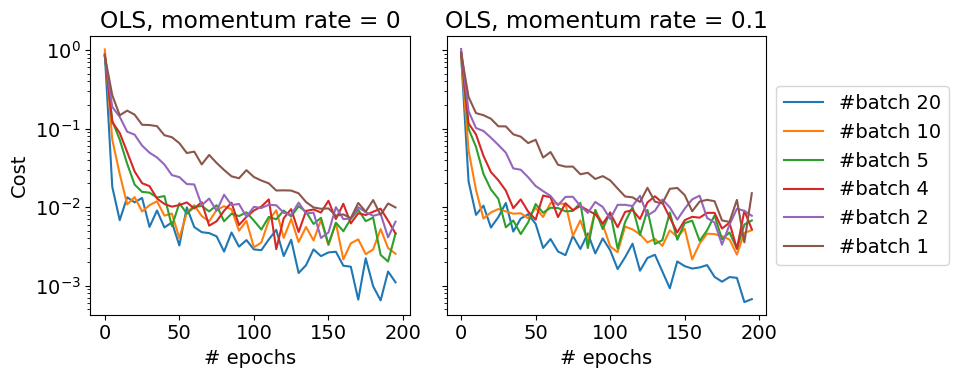

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#fig.suptitle("Stochastic gradient descent without momentum")

for i in range(len(batch_sizes)):
    ax[0].plot(nepochs, ols_cost_stoch[i], '-', label=f"#bach {int(ndata / batch_sizes[i])}")
    ax[1].plot(nepochs, ridge_cost_stoch[i], '-', label=f"#batch {int(ndata / batch_sizes[i])}")

ax[0].set(title="OLS, momentum rate = 0", xlabel="# epochs", ylabel="Cost")
ax[1].set(title="OLS, momentum rate = 0.1", xlabel="# epochs")
ax[0].set(xscale="linear", yscale="log")

ax[1].legend(loc='center right', ncol=1, bbox_to_anchor=(1.6, 0.5))
fig.tight_layout()

In [150]:
fig.savefig("figs/SGD_OLS_momentum_0d01_learning_0d1.pdf")

### 4. Implement ADAgrad to tune the learning rate

In [155]:
y = data


OLSGradientDescent(X, data, learning_rate=0.01, momentum=0, adaptive_method="adagrad")
OLSGradientDescent(X, data, learning_rate=0.01, momentum=0, adaptive_method="rms_prop")


/home/silja/Programs/miniconda3/envs/compsci/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/Statistics.py:19: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(M**2))
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/GradientDescent.py:145: RuntimeWarning: overflow encountered in divide
  beta = beta - momentum * gradient(beta_prev) - learning_rate * grad_beta / (np.sqrt(s) + eps)
/home/silja/Documents/Courses/compsci/CompSci-Projets/Project1/GradientDescent.py:154: RuntimeWarning: invalid value encountered in matmul
  cost = norm2(X @ beta - y) / ndata


(array([-inf, -inf, -inf]), 48, nan)

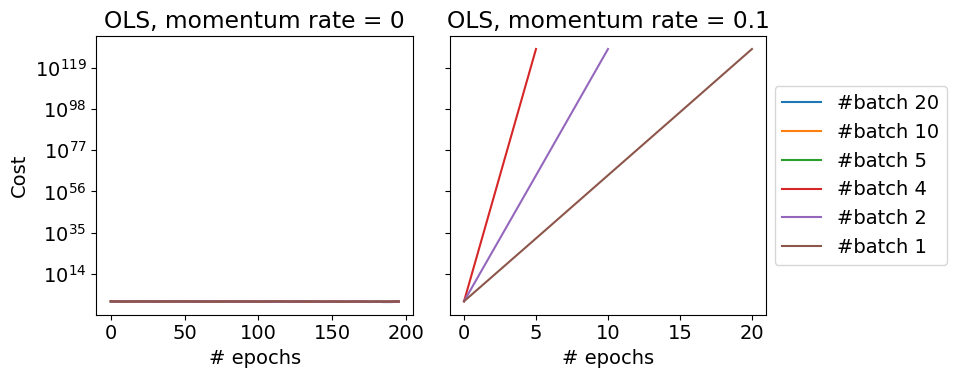

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#fig.suptitle("Stochastic gradient descent without momentum")

for i in range(len(batch_sizes)):
    ax[0].plot(nepochs, ols_cost_stoch[i], '-', label=f"#bach {int(ndata / batch_sizes[i])}")
    ax[1].plot(nepochs, ridge_cost_stoch[i], '-', label=f"#batch {int(ndata / batch_sizes[i])}")

ax[0].set(title="OLS, momentum rate = 0", xlabel="# epochs", ylabel="Cost")
ax[1].set(title="OLS, momentum rate = 0.1", xlabel="# epochs")
ax[0].set(xscale="linear", yscale="log")

ax[1].legend(loc='center right', ncol=1, bbox_to_anchor=(1.6, 0.5))
fig.tight_layout()

In [ ]:
fig.savefig("figs/SGD_OLS_momentum_0d01_learning_0d1.pdf")

### 5. Add RMPSprop and Adam

In [33]:
OLSStochasticGradientDescent(X, y, rms=0.9, momentum=0, nepochs=100, batch_size=5, eps=1e-8)



(array([2.17333412, 3.24512299, 4.12156574]), 0.07681684686863552)

In [55]:
from GradientDescent import OLSGradientDescent,testGradientDescent


In [53]:
OLSGradientDescent(X, y, 0.1)

(array([1.9999998 , 3.00000125, 3.99999874]), 23205, 2.112647296808916e-08)

In [56]:
testGradientDescent(X, y, 0.1, CostOLS)

(array([1.9999998 , 3.00000124, 3.99999874]), 24121, 2.111857504949778e-08)